In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
import functools
import tensorflow as tf
import numpy as np
import pandas as pd
from datetime import datetime
import math

In [7]:
df_characters = pd.read_csv("all_chars.csv",error_bad_lines=False)
print(df_characters.shape)

(683464, 901)


In [8]:
df_unicode_to_char = pd.read_csv("https://raw.githubusercontent.com/deannacodes/kuzushiji_recognition/master/unicode_translation.csv",error_bad_lines=False)
dict_unicode_to_char = df_unicode_to_char.set_index('Unicode').T.to_dict('list')

In [9]:
X = df_characters.drop(columns=["character"])
y = df_characters["character"]

In [10]:
import math

unicode_to_int = {}
unicode_to_char = {}
count = 0
for unicode in df_unicode_to_char["Unicode"]:
    unicode_to_int[unicode] = count
    if unicode in dict_unicode_to_char:
        unicode_to_char[count] = dict_unicode_to_char[unicode][0]
    count += 1
    
y = y.map(unicode_to_int)  
y = y.to_numpy()
# Some values in the dataframe were showing as nan, so we have to get rid of them manually.
drops = []
for i in range(0,len(y)):
    if math.isnan(y[i]):
        drops.append(i)

y = np.delete(y,drops,0)
X = X.drop(drops)
df_characters = df_characters.drop(drops)
X = X.to_numpy().astype('int')

predicted:  は


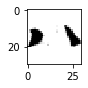

predicted:  ら


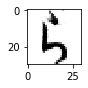

predicted:  天


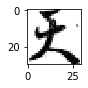

predicted:  ゝ


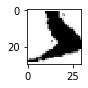

predicted:  根


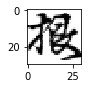

predicted:  と


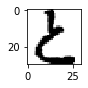

predicted:  也


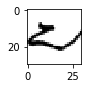

predicted:  付


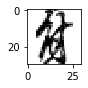

predicted:  ど


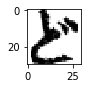

predicted:  棟


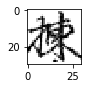

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

r = [n*100 for n in range(10)]
for i in r:
    image = X[i].reshape(30,30)
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    print("predicted: ", unicode_to_char[y[i]])
    plt.show()


In [11]:
from sklearn.model_selection import train_test_split

X = X.astype('float32')
X /= 255
y = np_utils.to_categorical(y, len(unicode_to_int))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

In [18]:
model = Sequential()
input_size = 900
hidden_neurons = 630
out_size = len(unicode_to_int)

print("Input Width:", input_size)
print("Data Size:", len(X_train))
print("Output Size:", out_size)

Input Width: 900
Data Size: 615097
Output Size: 4781


In [8]:
model.add(Dense(hidden_neurons, input_dim = input_size))
model.add(Activation('sigmoid')) 
model.add(Dense(out_size, input_dim = hidden_neurons))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

fitted_model = model.fit(X_train, y_train, validation_split=0.33, batch_size=32, epochs=30, verbose=1)

Train on 412114 samples, validate on 202983 samples
Epoch 1/30
412114/412114 [==============================] - 974s 2ms/step - loss: 2.5257 - accuracy: 0.5470 - val_loss: 1.9008 - val_accuracy: 0.6397
Epoch 2/30
412114/412114 [==============================] - 985s 2ms/step - loss: 1.6169 - accuracy: 0.6715 - val_loss: 1.6444 - val_accuracy: 0.6815
Epoch 3/30
412114/412114 [==============================] - 936s 2ms/step - loss: 1.3770 - accuracy: 0.7050 - val_loss: 1.6184 - val_accuracy: 0.6848
Epoch 4/30
412114/412114 [==============================] - 940s 2ms/step - loss: 1.2493 - accuracy: 0.7254 - val_loss: 1.6022 - val_accuracy: 0.6987
Epoch 5/30
412114/412114 [==============================] - 952s 2ms/step - loss: 1.1544 - accuracy: 0.7418 - val_loss: 1.6097 - val_accuracy: 0.7015
Epoch 6/30
412114/412114 [==============================] - 959s 2ms/step - loss: 1.0906 - accuracy: 0.7529 - val_loss: 1.5713 - val_accuracy: 0.7185
Epoch 7/30
412114/412114 [======================

In [4]:
import joblib   

#joblib.dump(model, 'kuzushiji_model.pkl')   

model_from_file = joblib.load('kuzushiji_model.pkl')  

In [12]:
y_predict = model_from_file.predict(X_test, verbose=0)
score = model_from_file.evaluate(X_test, y_test, verbose=1)
print(score)

68345/68345 [==============================] - 18s 267us/step
[2.0971414547237255, 0.7371717095375061]


(1, 110, 3670)
predicted:  め actual:  衝


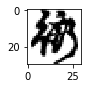

(4, 4348, 107)
predicted:  雲 actual:  ま


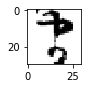

(6, 642, 168)
predicted:  十 actual:  ナ


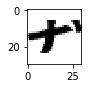

(7, 169, 203)
predicted:  ニ actual:  ヱ


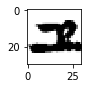

(11, 87, 107)
predicted:  な actual:  ま


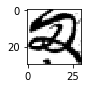

(16, 2190, 1556)
predicted:  民 actual:  戊


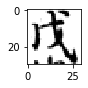

(17, 1871, 107)
predicted:  書 actual:  ま


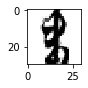

(18, 119, 56)
predicted:  り actual:  か


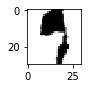

(19, 1250, 574)
predicted:  川 actual:  則


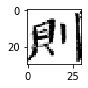

(20, 84, 83)
predicted:  で actual:  て


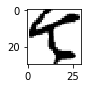

(22, 118, 2677)
predicted:  ら actual:  白


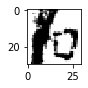

(30, 4310, 2264)
predicted:  階 actual:  浮


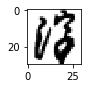

(37, 903, 4458)
predicted:  城 actual:  餅


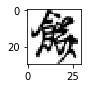

(40, 3772, 4084)
predicted:  証 actual:  道


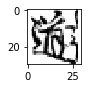

(45, 54, 252)
predicted:  え actual:  上


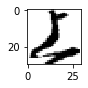

(51, 3175, 2261)
predicted:  者 actual:  浦


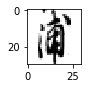

(53, 57, 65)
predicted:  が actual:  ご


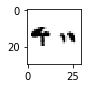

(54, 76, 118)
predicted:  た actual:  ら


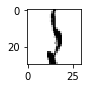

(55, 2351, 2286)
predicted:  漢 actual:  深


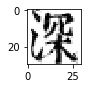

(56, 119, 92)
predicted:  り actual:  は


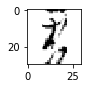

(59, 4039, 4052)
predicted:  返 actual:  送


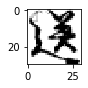

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

mistakes = []
for i in range(len(y_predict)):
    max_p = 0
    max_a = 0
    for j in range(len(unicode_to_int)):
        if y_predict[i][max_p] < y_predict[i][j]:
            max_p = j
        if y_test[i][max_a] < y_test[i][j]:
            max_a = j
    if max_p != max_a:
        mistakes.append((i,max_p,max_a))
    if len(mistakes) > 20:
        break;

for m in mistakes:
    (mistake, predicted, actual) = m
    print(m)
    print("predicted: ", unicode_to_char[predicted], "actual: ", unicode_to_char[actual])
    image = X_test[mistake].reshape(30,30)
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    plt.show()    
    j += 1
